# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [72]:
import numpy as np 
import numpy as pd 
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# Its difficult to read using this so ise another method as files 
# df = pd.read_csv("customer_booking.csv")

In [74]:
with open("customer_booking.csv", "r", encoding="iso-8859-1") as file:
    data = file.read()

In [76]:
import pandas as pd
from io import StringIO

# Assuming 'data' contains the content read from the CSV file
# You've already read the data using the code you provided
# Now, convert it to a DataFrame
df = pd.read_csv(StringIO(data), encoding="iso-8859-1")

# Now 'df' is your DataFrame containing the CSV data


In [77]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


### Exploratory Data Analysis

In [78]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

<p>
    The .info() method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.
    To provide more context, below is a more detailed data description, explaining exactly what each column means:

    * num_passengers = number of passengers travelling
    * sales_channel = sales channel booking was made on
    * trip_type = trip Type (Round Trip, One Way, Circle Trip)
    * purchase_lead = number of days between travel date and booking date
    * length_of_stay = number of days spent at destination
    * flight_hour = hour of flight departure
    * flight_day = day of week of flight departure
    * route = origin -> destination flight route
    * booking_origin = country from where booking was made
    * wants_extra_baggage = if the customer wanted extra baggage in the booking
    * wants_preferred_seat = if the customer wanted a preferred seat in the booking
    * wants_in_flight_meals = if the customer wanted in-flight meals in the booking
    * flight_duration = total duration of flight (in hours)
    * booking_complete = flag indicating if the customer completed the booking
Before we compute any statistics on the data, lets do any necessary data conversion
    </p>

In [80]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [81]:
df.shape

(50000, 14)

In [82]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [83]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [84]:
df['num_passengers'].nunique()

9

In [85]:
df['num_passengers'].unique()

array([2, 1, 3, 4, 6, 5, 7, 9, 8])

In [86]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [87]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [88]:
df['purchase_lead'].unique()

array([262, 112, 243,  96,  68,   3, 201, 238,  80, 378, 185,   8, 265,
       245, 192, 259,  19,  67, 351, 228,  21,  23,  25,  16,  66,  51,
        37, 101,   7,   5,  33,  20,  56,  13,  71, 346,   9,  65, 221,
       107,  14,  77,  24,  47,  22,  11,  35, 272, 250, 161, 128, 190,
       311,  27, 314, 102,   2,  26,  32,  57, 198, 120,  69, 281, 282,
        15,  31, 316, 232, 156, 196, 283,  34,  63,   6, 227, 181, 138,
       134,  85,  93, 118,  90, 168, 127,  18, 153, 186, 263, 172, 230,
        42,  81, 140, 285, 179, 341, 173, 180, 366, 229, 174,  82,  75,
       163, 105, 276, 110,  83, 154,  55,  45,  54, 193,  10, 166,  97,
       239, 182,  99,  53,  28, 384,  70, 126, 142,  87,  86, 313,  41,
        91, 206, 197, 268, 157, 145, 241, 139,  59, 396, 280,  79, 380,
       132, 121, 419,  58, 115, 236, 225, 116, 191, 275, 417, 159,  92,
       106, 218, 295,  12, 305, 235, 332, 125, 204, 310, 368, 169, 214,
       155, 325, 130, 189, 226, 122,  88, 211, 188, 129, 149,  3

In [89]:
df['length_of_stay'].unique()

array([ 19,  20,  22,  31,  48,  33,  30,  25,  43,  24,  17,  34,  18,
        37,  29, 155,  88,  27,  21,  28,  47,  35,  82,  26,  90,  23,
        84,  61,  40,  96,  69,  89,  58,  56, 110, 165, 111,  38, 207,
        91,   1, 274,  44,  57, 106,  68,  87,  51, 196,  77,  41, 278,
       108, 180,  72,  32,  62,  45,  50,  59, 125, 124,  46,  55,  60,
        36,  65, 208, 204,  83,  42,  85,  64,  86,  54, 238, 275,  39,
        95,  70,  93,  49, 107, 121, 203, 188,  78, 209, 126,  80, 200,
       255,  63,  92, 118,  79, 181,  76,  94, 305, 149, 177, 183, 162,
        71, 109,  52, 140,  66, 184, 152,  53, 291, 329,  75, 130, 142,
       175,  73, 304, 186, 116, 101, 223, 415, 312, 143,  81, 144, 134,
       135, 117, 120, 138, 153,  74, 261, 103, 104, 112, 157, 266,  98,
       318,  67, 273, 105, 148, 102, 119, 122, 603, 465, 409, 128, 233,
        99, 113, 147, 127,  97, 170, 156, 160, 182, 115, 158,   0, 357,
       173, 228, 205, 178, 123, 352, 141, 139, 129, 301, 176, 33

In [90]:
df['flight_hour'].unique()

array([ 7,  3, 17,  4, 15, 20,  6, 14, 12,  2, 19, 10,  8, 23,  9, 13, 11,
        0,  1,  5, 16, 18, 22, 21])

In [91]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [92]:
mapping = {
    'Mon' : 1,
    'Tue' : 2,
    'Wed' : 3,
    'Thu' : 4,
    'Fri' : 5,
    'Sat' : 6, 
    'Sun' : 7
}

df['flight_day'] = df['flight_day'].map(mapping)

In [93]:
df['flight_day']

0        6
1        6
2        3
3        6
4        3
        ..
49995    6
49996    7
49997    6
49998    1
49999    4
Name: flight_day, Length: 50000, dtype: int64

In [94]:
df['flight_day'].value_counts()

flight_day
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: count, dtype: int64

In [95]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [96]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [97]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [98]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [99]:
df['wants_extra_baggage'].unique()

array([1, 0])

In [100]:
df['wants_preferred_seat'].unique()

array([0, 1])

In [101]:
df['wants_in_flight_meals'].unique()

array([0, 1])

In [102]:
df['flight_duration'].unique()

array([5.52, 5.07, 7.57, 6.62, 7.  , 4.75, 8.83, 7.42, 6.42, 5.33, 4.67,
       5.62, 8.58, 8.67, 4.72, 8.15, 6.33, 5.  , 4.83, 9.5 , 5.13])

In [103]:
df['booking_complete'].unique()

array([0, 1])

In [104]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<p>The .describe() method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.
From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.</p>

In [105]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

No null values in the dataset

In [106]:
df.duplicated().sum()

719

In [107]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [108]:
# Remove the duplicate value from dataset

df = df.drop_duplicates()

In [109]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


### Encoding Categorical data


Categorical variables need to be converted into a numerical format that machine learning models can work with. Two common techniques for encoding categorical variables are one-hot encoding and label encoding.

One-Hot Encoding: Use one-hot encoding for categorical variables with no inherent order or ranking. Each category becomes a binary (0 or 1) column.

In [118]:
cat_columns = df.select_dtypes(include = 'object').columns

In [119]:
cat_columns

Index(['sales_channel', 'route', 'booking_origin'], dtype='object')

In [120]:

# Assuming 'df' is your DataFrame
df_encoded = pd.get_dummies(df, columns = cat_columns)


In [122]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


In [123]:
for i in cat_columns:
    df[i] = df[[i]].apply(label_encoder.fit_transform)
    
print("Converted all the features of the training dataset to numerical") 

Converted all the features of the training dataset to numerical


/var/folders/r0/qtsxcwpj7r96k31gfqxpf60m0000gn/T/ipykernel_909/1215339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[[i]].apply(label_encoder.fit_transform)
/var/folders/r0/qtsxcwpj7r96k31gfqxpf60m0000gn/T/ipykernel_909/1215339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[[i]].apply(label_encoder.fit_transform)
/var/folders/r0/qtsxcwpj7r96k31gfqxpf60m0000gn/T/ipykernel_909/1215339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [125]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


### Feature Scaling

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
standard_scaler = StandardScaler()

In [132]:
# Scale the training dataset

standard_scaler.fit(df)

scaled_df = pd.DataFrame(standard_scaler.transform(df), columns = df.columns)

print("All the features in the training dataset are scaled now")

All the features in the training dataset are scaled now


In [134]:
scaled_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.403150,-0.349485,0.095924,1.960824,-0.119827,-0.382535,1.097640,-1.726213,0.693918,0.704622,-0.647851,-0.862606,-1.176158,-0.420046
1,-0.580591,-0.349485,0.095924,0.301703,-0.090269,-1.121490,1.097640,-1.726213,0.693918,-1.419200,-0.647851,-0.862606,-1.176158,-0.420046
2,0.403150,-0.349485,0.095924,1.750668,-0.031153,1.464855,-0.408466,-1.726213,-0.068616,0.704622,1.543565,-0.862606,-1.176158,-0.420046
3,-0.580591,-0.349485,0.095924,0.124730,0.234868,-0.936751,1.097640,-1.726213,0.693918,-1.419200,-0.647851,1.159277,-1.176158,-0.420046
4,0.403150,-0.349485,0.095924,-0.184973,-0.031153,1.095377,-0.408466,-1.726213,-0.068616,0.704622,-0.647851,1.159277,-1.176158,-0.420046


### Data Splitting

In [135]:
from sklearn.model_selection import train_test_split

X = df.drop("booking_complete", axis=1)  # Features
y = df["booking_complete"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
32040,4,0,2,69,4,1,4,378,85,1,0,0,6.33
16012,2,0,2,126,17,3,4,515,4,1,0,0,8.83
41827,2,0,2,20,5,23,1,728,80,1,0,0,5.62
8656,1,0,2,25,28,8,4,279,37,1,0,0,5.52
6110,3,0,2,231,64,13,2,174,4,1,0,1,8.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11435,2,0,2,3,52,23,5,354,17,1,0,0,5.07
45357,1,0,2,19,6,22,6,302,43,0,0,0,7.00
38667,3,0,2,43,5,10,1,385,43,0,0,0,7.57
874,2,0,2,294,22,14,1,6,51,1,0,1,8.83


In [137]:
y_train

32040    0
16012    0
41827    0
8656     0
6110     0
        ..
11435    0
45357    0
38667    0
874      0
16001    0
Name: booking_complete, Length: 39424, dtype: int64

In [138]:
X_test

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
18711,1,0,2,33,37,14,7,621,71,1,0,1,8.83
42436,2,0,2,4,6,15,6,6,51,1,0,0,8.83
6588,1,0,2,6,24,12,4,176,4,1,0,1,5.62
21148,1,0,2,22,71,4,5,659,4,1,0,1,5.62
4012,1,0,2,7,18,9,2,105,43,0,1,0,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,1,0,2,16,17,6,4,104,37,0,0,1,9.50
6975,2,0,2,82,55,8,3,178,4,1,1,1,8.58
7137,1,0,2,112,29,23,7,178,4,1,1,1,8.58
26082,1,0,2,419,2,17,7,436,85,0,0,0,6.62


In [139]:
y_test

18711    0
42436    0
6588     0
21148    0
4012     0
        ..
3956     0
6975     0
7137     0
26082    0
4435     0
Name: booking_complete, Length: 9857, dtype: int64

### Model Selection

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report 

In [146]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [147]:
# Make predictions on the test data

y_pred = rf_classifier.predict(X_test)

In [148]:

# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [149]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_


In [150]:
# Associate feature importances with feature names
feature_names = X_train.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})


In [151]:
# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                  Feature  Importance
3           purchase_lead    0.193945
7                   route    0.149424
5             flight_hour    0.141490
4          length_of_stay    0.127558
8          booking_origin    0.106148
6              flight_day    0.092046
12        flight_duration    0.071276
0          num_passengers    0.048958
11  wants_in_flight_meals    0.023142
10   wants_preferred_seat    0.017486
9     wants_extra_baggage    0.014743
1           sales_channel    0.012161
2               trip_type    0.001623


In [152]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8378
           1       0.54      0.10      0.16      1479

    accuracy                           0.85      9857
   macro avg       0.70      0.54      0.54      9857
weighted avg       0.81      0.85      0.81      9857



#### Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model (for regression, typically using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.12


#### Decision Trees

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model (for classification, use accuracy and classification report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      8378
           1       0.28      0.32      0.30      1479

    accuracy                           0.77      9857
   macro avg       0.58      0.59      0.58      9857
weighted avg       0.79      0.77      0.78      9857



#### Gradient Boosting

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model (for classification, use accuracy and classification report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8378
           1       0.53      0.03      0.06      1479

    accuracy                           0.85      9857
   macro avg       0.69      0.51      0.49      9857
weighted avg       0.80      0.85      0.79      9857



### Model Evaluation

In [160]:
from sklearn.model_selection import cross_val_score

# Example for cross-validation with a classification model (e.g., RandomForestClassifier)
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()

mean_accuracy

0.47837154507509333

In [164]:
from sklearn.model_selection import cross_val_score

# Example for cross-validation with a classification model (e.g., RandomForestClassifier)
scores1 = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
tree_mean_accuracy = scores1.mean()

tree_mean_accuracy

0.4061317670611827

In [166]:
from sklearn.model_selection import cross_val_score

# Example for cross-validation with a classification model (e.g., RandomForestClassifier)
scores2 = cross_val_score(gradient_boosting, X, y, cv=5, scoring='accuracy')
gradient_mean_accuracy = scores2.mean()

gradient_mean_accuracy

0.5294470382640591

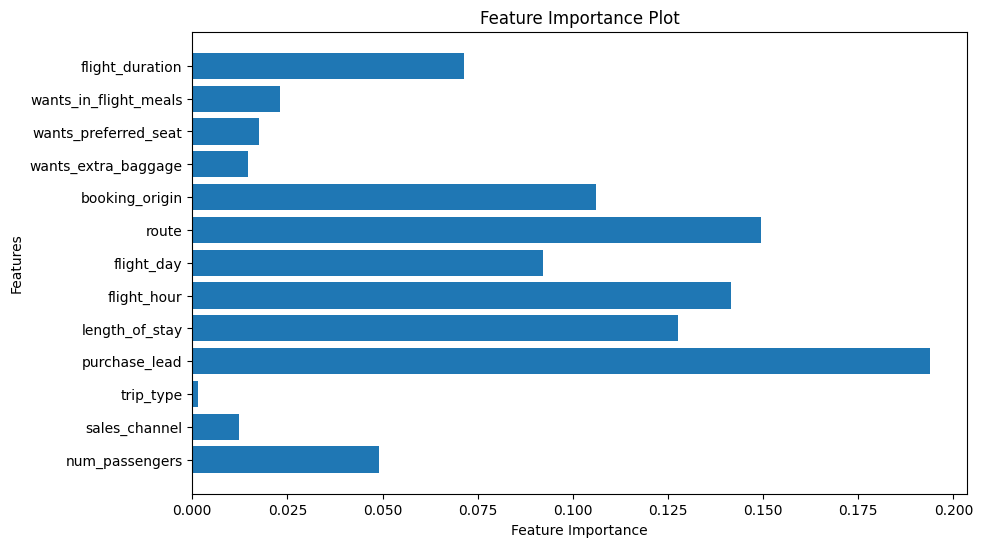

In [167]:

# Assuming 'model' is your trained RandomForestClassifier
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


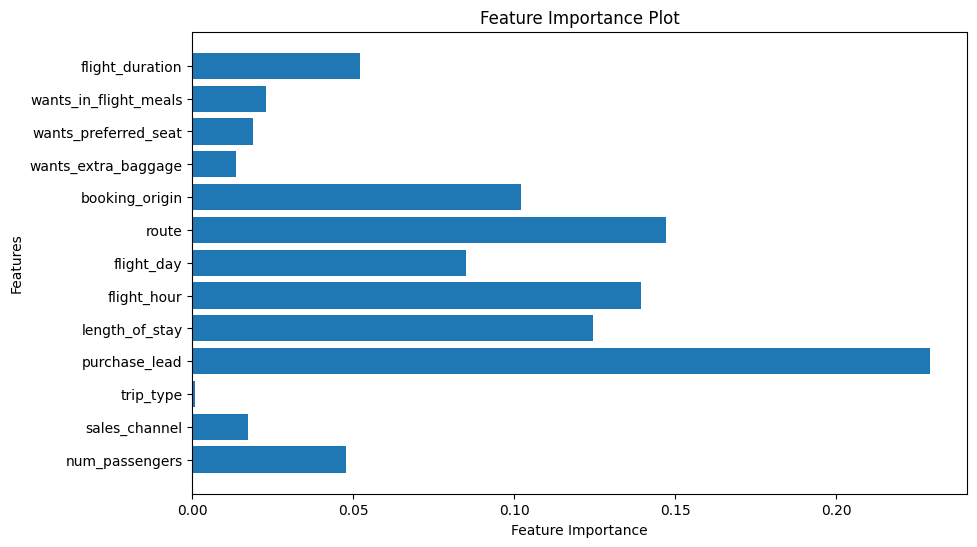

In [168]:

# Assuming 'model' is your trained RandomForestClassifier
feature_importances = decision_tree.feature_importances_
feature_names = X.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

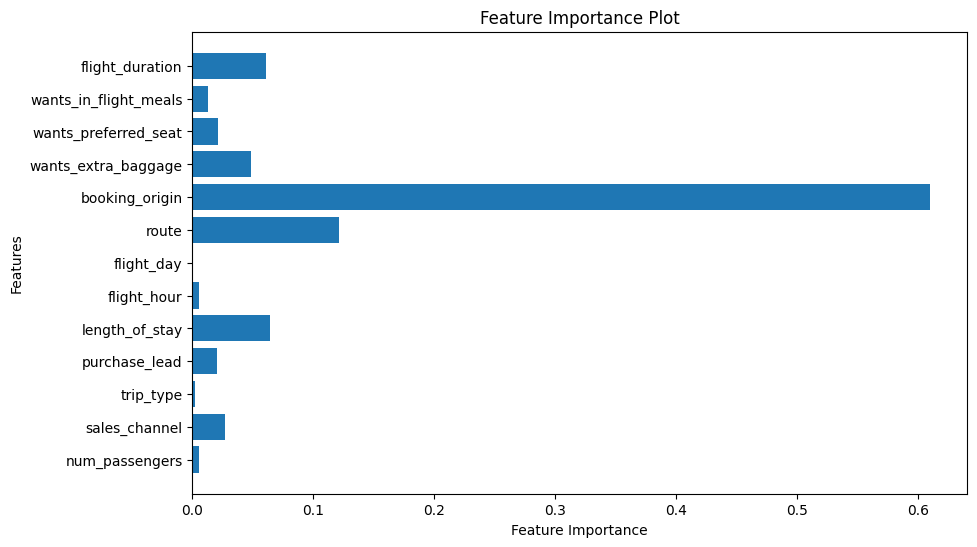

In [169]:

# Assuming 'model' is your trained RandomForestClassifier
feature_importances = gradient_boosting.feature_importances_
feature_names = X.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()